In [1]:

import pandas as pd, datetime as dt, numpy as np

df = pd.read_csv("linkedin_job_listings_enhanced.csv",encoding='utf-8')

print(df.head())
print(df.info())

  company_name                                          job_title department  \
0    Chargebee  Chargebee hiring Product Marketing Manager in ...  Marketing   
1    Chargebee  Chargebee hiring Staff Product Manager in Chen...    Product   
2    Chargebee       Large Enterprise Program Manager - Chargebee      Other   
3    Chargebee        Product Marketing Manager -SAAS - Chargebee  Marketing   
4    Chargebee    Product Marketing Manager - Revenue Recognition  Marketing   

                                            location seniority  \
0  Chargebee Is Seeking A Product Marketing Manag...       Mid   
1                             Information Technology       Mid   
2  Chargebee Is A Leading Provider Of Billing And...       Mid   
3  4 Years Of Product Marketing Experience In Saa...       Mid   
4  Chargebee Is Seeking A Product Marketing Manag...       Mid   

                                             job_url  \
0  https://www.linkedin.com/jobs/view/product-mar...   
1  https:/

In [2]:
import pandas as pd, numpy as np, datetime as dt

df_clean = df.copy()


df_clean.columns = [c.strip().lower().replace(' ', '_') for c in df_clean.columns]


current_ts = pd.Timestamp.now()
df_clean['processed_timestamp'] = current_ts


function_map = {
    'engineering': 'Engineering',
    'product': 'Product',
    'marketing': 'Marketing',
    'sales': 'Sales',
    'finance': 'Finance',
    'hr': 'HR',
    'other': 'Other'
}


role_function = []
for i, row in df_clean.iterrows():
    dept = str(row['department']).strip().lower()
    if dept in function_map:
        role_function.append(function_map[dept])
    else:
        title = str(row['job_title']).lower()
        if 'engineer' in title or 'developer' in title:
            role_function.append('Engineering')
        elif 'product' in title:
            role_function.append('Product')
        elif 'marketing' in title:
            role_function.append('Marketing')
        elif 'sales' in title or 'account executive' in title:
            role_function.append('Sales')
        elif 'finance' in title or 'accountant' in title:
            role_function.append('Finance')
        elif 'hr' in title or 'talent' in title:
            role_function.append('HR')
        else:
            role_function.append('Other')


df_clean['role_function'] = role_function


remote_mask = df_clean['location'].str.contains('remote', case=False, na=False)
df_clean['growth_tag_remote_hiring_focus'] = np.where(remote_mask, True, False)


product_counts = df_clean[df_clean['role_function'] == 'Product']['company_name'].value_counts()
product_build_companies = product_counts[product_counts >= 3].index.tolist()

df_clean['growth_tag_product_team_buildout'] = df_clean.apply(lambda r: True if (r['company_name'] in product_build_companies and r['role_function'] == 'Product') else False, axis=1)


print(df_clean.head())

  company_name                                          job_title department  \
0    Chargebee  Chargebee hiring Product Marketing Manager in ...  Marketing   
1    Chargebee  Chargebee hiring Staff Product Manager in Chen...    Product   
2    Chargebee       Large Enterprise Program Manager - Chargebee      Other   
3    Chargebee        Product Marketing Manager -SAAS - Chargebee  Marketing   
4    Chargebee    Product Marketing Manager - Revenue Recognition  Marketing   

                                            location seniority  \
0  Chargebee Is Seeking A Product Marketing Manag...       Mid   
1                             Information Technology       Mid   
2  Chargebee Is A Leading Provider Of Billing And...       Mid   
3  4 Years Of Product Marketing Experience In Saa...       Mid   
4  Chargebee Is Seeking A Product Marketing Manag...       Mid   

                                             job_url  \
0  https://www.linkedin.com/jobs/view/product-mar...   
1  https:/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

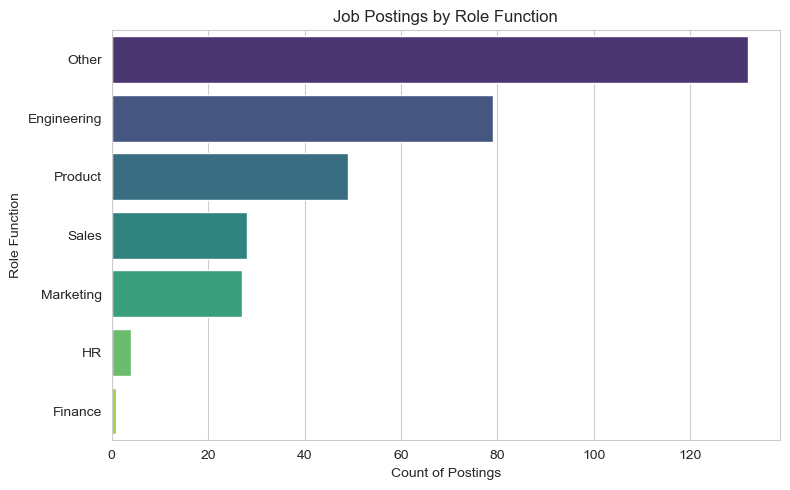

In [5]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
role_counts = df_clean['role_function'].value_counts().sort_values(ascending=False)
sns.barplot(x=role_counts.values, y=role_counts.index,hue=role_counts.index, palette='viridis',legend=False)
plt.title('Job Postings by Role Function')
plt.xlabel('Count of Postings')
plt.ylabel('Role Function')
plt.tight_layout()
plt.show()

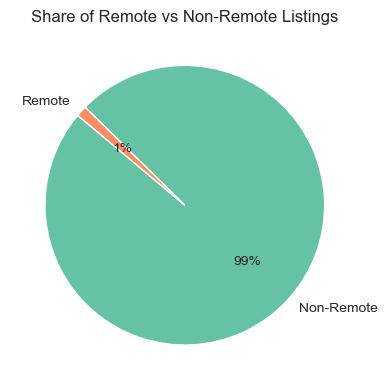

In [6]:
plt.figure(figsize=(6,4))
remote_counts = df_clean['growth_tag_remote_hiring_focus'].value_counts()
labels = ['Non-Remote','Remote']
plt.pie(remote_counts.values, labels=labels, autopct='%1.0f%%', startangle=140, colors=['#66c2a5','#fc8d62'])
plt.title('Share of Remote vs Non-Remote Listings')
plt.tight_layout()
plt.show()

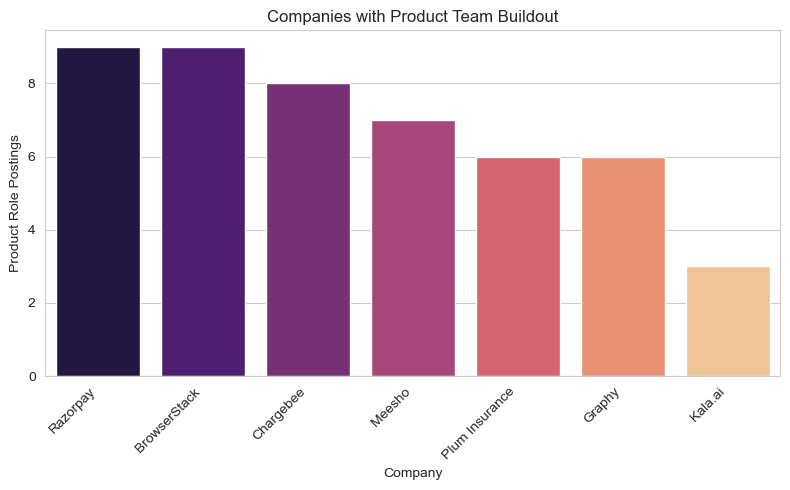

Visualizations generated.


In [8]:
buildout_df = df_clean[df_clean['growth_tag_product_team_buildout']]
if not buildout_df.empty:
    plt.figure(figsize=(8,5))
    prod_counts = buildout_df['company_name'].value_counts()
    sns.barplot(x=prod_counts.index, y=prod_counts.values,hue=prod_counts.index, palette='magma',legend=False)
    plt.title('Companies with Product Team Buildout')
    plt.xlabel('Company')
    plt.ylabel('Product Role Postings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('No companies currently meet the product team buildout criteria.')

print('Visualizations generated.')

In [20]:
print(df_clean.head())

  company_name                                          job_title department  \
0    Chargebee  Chargebee hiring Product Marketing Manager in ...  Marketing   
1    Chargebee  Chargebee hiring Staff Product Manager in Chen...    Product   
2    Chargebee       Large Enterprise Program Manager - Chargebee      Other   
3    Chargebee        Product Marketing Manager -SAAS - Chargebee  Marketing   
4    Chargebee    Product Marketing Manager - Revenue Recognition  Marketing   

                                            location seniority  \
0  Chargebee Is Seeking A Product Marketing Manag...       Mid   
1                             Information Technology       Mid   
2  Chargebee Is A Leading Provider Of Billing And...       Mid   
3  4 Years Of Product Marketing Experience In Saa...       Mid   
4  Chargebee Is Seeking A Product Marketing Manag...       Mid   

                                             job_url  \
0  https://www.linkedin.com/jobs/view/product-mar...   
1  https:/

In [10]:
import re, pandas as pd

df_clean2 = df_clean.copy()

def clean_title(title):
    if pd.isna(title):
        return title
    t = str(title)
    
    t = re.sub(r'.*?hiring\s+', '', t, flags=re.IGNORECASE)
   
    t = re.sub(r'\s+[-|–]\s+.*$', '', t)
    
    t = re.sub(r'[-–|]\s+.*$', '', t)
    
    t = t.strip()
    return t.title()

def extract_city(loc):
    if pd.isna(loc):
        return loc
    l = str(loc)
    
    if 'remote' in l.lower():
        return 'Remote'
    
    l_split = re.split(r'[,-]', l)
    city = l_split[0].strip()
    return city.title()


df_clean2['job_title_clean'] = df_clean2['job_title'].apply(clean_title)
df_clean2['location_city'] = df_clean2['location'].apply(extract_city)


print(df_clean2[['job_title', 'job_title_clean', 'location', 'location_city']].head())

                                           job_title  \
0  Chargebee hiring Product Marketing Manager in ...   
1  Chargebee hiring Staff Product Manager in Chen...   
2       Large Enterprise Program Manager - Chargebee   
3        Product Marketing Manager -SAAS - Chargebee   
4    Product Marketing Manager - Revenue Recognition   

                               job_title_clean  \
0   Product Marketing Manager In Salt Lake ...   
1  Staff Product Manager In Chennai, Tamil ...   
2             Large Enterprise Program Manager   
3              Product Marketing Manager -Saas   
4                    Product Marketing Manager   

                                            location  \
0  Chargebee Is Seeking A Product Marketing Manag...   
1                             Information Technology   
2  Chargebee Is A Leading Provider Of Billing And...   
3  4 Years Of Product Marketing Experience In Saa...   
4  Chargebee Is Seeking A Product Marketing Manag...   

                         

In [13]:
drop = ['job_title', 'location_city']

df_final = df_clean2.drop(columns=drop, errors='ignore')

print(df_final.head())

  company_name department                                           location  \
0    Chargebee  Marketing  Chargebee Is Seeking A Product Marketing Manag...   
1    Chargebee    Product                             Information Technology   
2    Chargebee      Other  Chargebee Is A Leading Provider Of Billing And...   
3    Chargebee  Marketing  4 Years Of Product Marketing Experience In Saa...   
4    Chargebee  Marketing  Chargebee Is Seeking A Product Marketing Manag...   

  seniority                                            job_url  \
0       Mid  https://www.linkedin.com/jobs/view/product-mar...   
1       Mid  https://in.linkedin.com/jobs/view/staff-produc...   
2       Mid  https://www.linkedin.com/jobs/view/large-enter...   
3       Mid  https://in.linkedin.com/jobs/view/product-mark...   
4       Mid  https://in.linkedin.com/jobs/view/product-mark...   

                            growth_signal_tag        processed_timestamp  \
0  Leadership Upgrade, New Product Initiative 

In [16]:
df.columns

Index(['company_name', 'job_title', 'department', 'location', 'seniority',
       'job_url', 'growth_signal_tag'],
      dtype='object')

In [28]:

df_final['processed_timestamp'] = pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')

print(df_final[['processed_timestamp']].head())


final_file = 'linkedin_job_listings_cleaned.csv'
df_final.to_csv(final_file, index=False, encoding='utf-8')
print('Dataset with formatted timestamp saved to', final_file)

   processed_timestamp
0  2025-06-21 20:16:32
1  2025-06-21 20:16:32
2  2025-06-21 20:16:32
3  2025-06-21 20:16:32
4  2025-06-21 20:16:32
Dataset with formatted timestamp saved to linkedin_job_listings_cleaned.csv


In [18]:
df.columns

Index(['company_name', 'job_title', 'department', 'location', 'seniority',
       'job_url', 'growth_signal_tag'],
      dtype='object')

In [22]:

row3 = df_final.iloc[3]
print('Row index 3 details:')
print(row3)


company_counts = df_final['company_name'].value_counts()
function_counts = df_final['role_function'].value_counts()

tag_matrix = df_final.groupby(['company_name']).agg({
    'growth_tag_remote_hiring_focus':'sum',
    'growth_tag_product_team_buildout':'sum'
}).reset_index()



Row index 3 details:
company_name                                                                Chargebee
department                                                                  Marketing
location                            4 Years Of Product Marketing Experience In Saa...
seniority                                                                         Mid
job_url                             https://in.linkedin.com/jobs/view/product-mark...
growth_signal_tag                          Leadership Upgrade, New Product Initiative
processed_timestamp                                               2025-06-21 19:19:46
role_function                                                               Marketing
growth_tag_remote_hiring_focus                                                  False
growth_tag_product_team_buildout                                                False
job_title_clean                                       Product Marketing Manager -Saas
Name: 3, dtype: object


In [23]:

print(company_counts.head())


company_name
Kala.ai      50
Yellow.ai    44
Graphy       43
Razorpay     43
Chargebee    42
Name: count, dtype: int64


In [24]:
print(function_counts.head())
print(tag_matrix.head())

role_function
Other          132
Engineering     79
Product         49
Sales           28
Marketing       27
Name: count, dtype: int64
   company_name  growth_tag_remote_hiring_focus  \
0  BrowserStack                               1   
1     Chargebee                               0   
2        Graphy                               1   
3       Kala.ai                               0   
4        Meesho                               0   

   growth_tag_product_team_buildout  
0                                 9  
1                                 8  
2                                 6  
3                                 3  
4                                 7  
